# **Lab 2 - Diabetes Progression Prediction**

Name : Divyamol Madathilparambil Sunilkumar

Student ID : 8944434



## *Part 1. Data Loading and Preprocessing* 

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Part 1
# 1.1 Load the Dataset
from sklearn.datasets import load_diabetes
database_diabetes = load_diabetes(as_frame=True)

In [120]:
database_diabetes.data.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930


In [121]:
df = database_diabetes.frame  # Convert to DataFrame

## Frame the Problem
**Objective:** Predict the disease progression one year after baseline.

> Inputs: The dataset includes medical measurements (BMI, blood pressure, blood serum levels, etc.).

> Output: A numerical value indicating disease progression.

> Use Case: The goal is to develop a predictive model to assist physicians in assessing diabetes risk.

## Exploratory Data Analysis (EDA)

In [122]:

# Display first few rows
display(df.head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [123]:
df.shape

(442, 11)

In [124]:

# Data summary
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


None

In [125]:

# Summary statistics
display(df.describe())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [126]:

# Check for missing values
display(df.isnull().sum())



age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### Visualizing Data

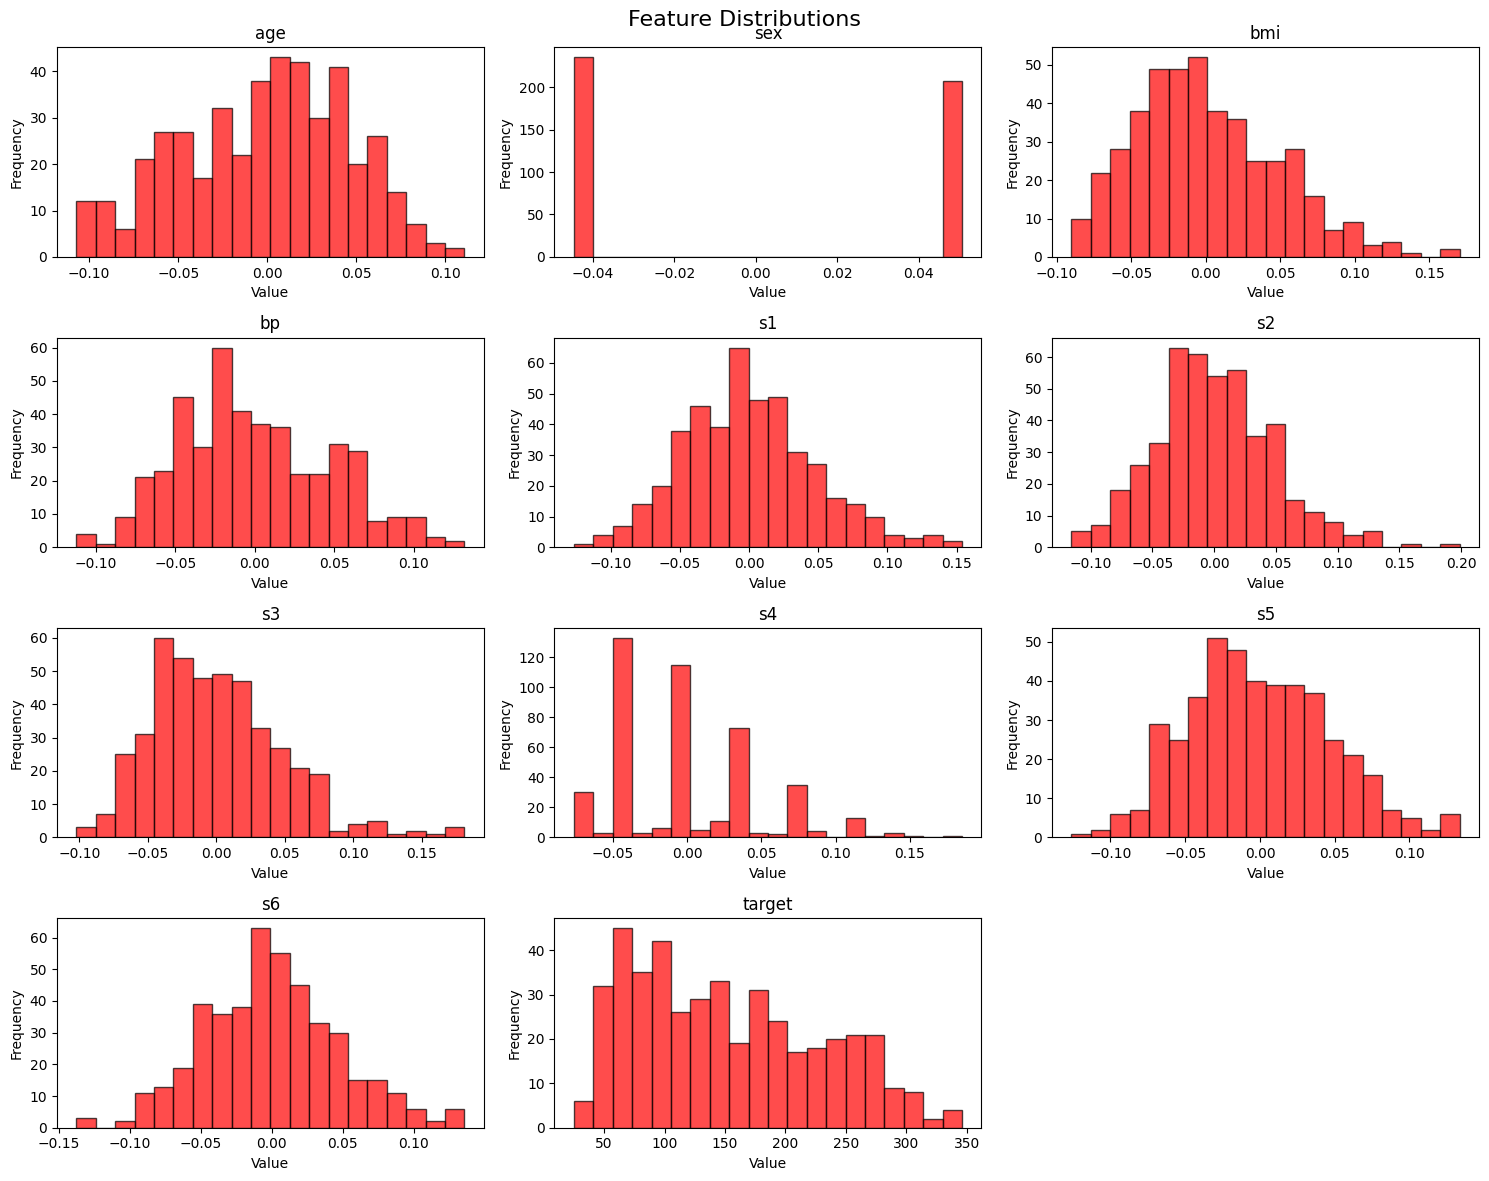

In [127]:
# Feature Distributions 
num_cols = df.shape[1]
plt.figure(figsize=(15, 12))  

for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)  
    plt.hist(df[column], bins=20, edgecolor='black', alpha=0.7,color='red')  
    plt.title(column)
    plt.xlabel("Value")  
    plt.ylabel("Frequency")  

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

### Correlation Matrix

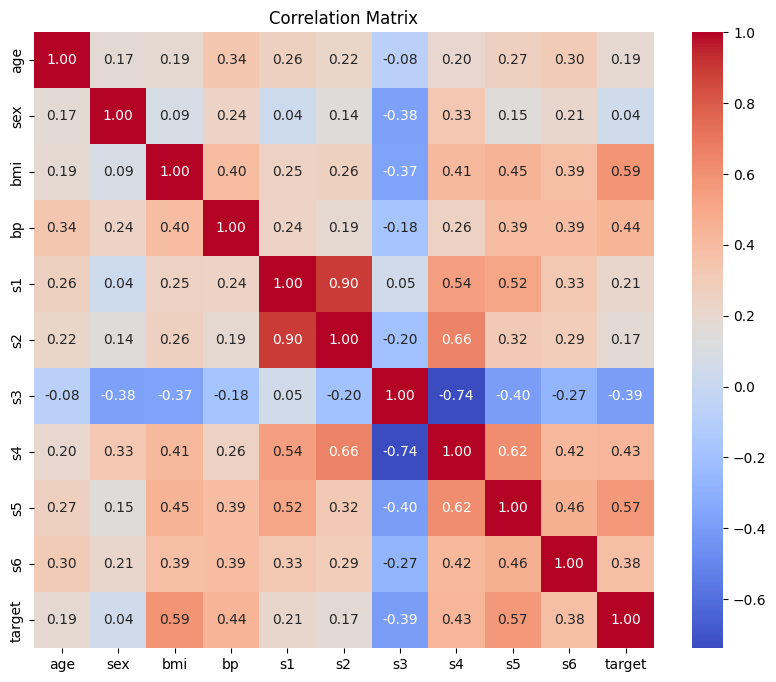

In [128]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### **Observations from Feature Distributions**
- Most features are centered around zero, indicating standardization.
- `sex` has two distinct values, likely representing male and female groups.
- `BMI` and `S5` follow a normal distribution.
- `S1`, `S2`, and `S6` are slightly skewed.
-  The `target` variable is right-skewed, meaning some high values could be outliers.
- `BMI`, `S5`, and `BP` have strong correlation with the target variable.
- `S3` has a negative correlation, meaning higher values may indicate lower disease progression.
- `S1` and `S2` are highly correlated, suggesting redundancy.


> `NOTE` :  No missing values found, no major cleaning required

## *Split the Data*

In [129]:
# Train (75%), Validation (10%), Test (15%) Split
from sklearn.model_selection import train_test_split 


# Train-Validation-Test Split
X = df.drop('target', axis=1)
y = df['target']

# First, split into Train+Validation (85%) and Test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Then, split Train+Validation (85%) into Train (75%) and Validation (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10/85, random_state=42)  # 10/85 is approx 11.76%, which makes Train 75%

# Verify the sizes
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 330
Validation set size: 45
Test set size: 67


# **Part 2- Univariate Polynomial Regression on BMI**

In [130]:
#part 2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error,mean_absolute_percentage_error


## Train Polynomial Regression Models (Degree 0 to 5)

In [131]:

X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]

results = []
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_bmi_poly = poly.fit_transform(X_train_bmi)
    X_val_bmi_poly = poly.transform(X_val_bmi)
    
    model = LinearRegression()
    model.fit(X_train_bmi_poly, y_train)
    
    y_train_pred = model.predict(X_train_bmi_poly)
    y_val_pred = model.predict(X_val_bmi_poly)
    
    r2 = r2_score(y_val, y_val_pred)
    mae = mean_absolute_error(y_val, y_val_pred)
    mape = mean_absolute_percentage_error(y_val, y_val_pred) * 100
    
    results.append([degree, r2, mae, mape])

results_df = pd.DataFrame(results, columns=['Degree', 'R-squared', 'MAE', 'MAPE'])
print(results_df)

   Degree  R-squared        MAE       MAPE
0       0  -0.000011  63.447475  58.793283
1       1   0.449292  41.997581  40.444999
2       2   0.449158  41.757683  40.309938
3       3   0.447291  41.741042  40.258961
4       4   0.449064  41.952846  40.240642
5       5   0.453513  42.083400  40.340475


The best model is identified using the R² score on the validation set (R-squared Validation). The model with the highest validation R² score is selected as the best polynomial degree.

In [132]:
best_degree = results_df.loc[results_df['R-squared'].idxmax()]['Degree']
print(f"Best degree: {best_degree}")

Best degree: 5.0


## Create polynomial features for the test set

In [133]:

poly = PolynomialFeatures(degree=int(best_degree))
X_train_bmi_poly = poly.fit_transform(X_train_bmi)
X_test_bmi_poly = poly.transform(X_test_bmi)

best_model = LinearRegression()
best_model.fit(X_train_bmi_poly, y_train)
y_test_pred = best_model.predict(X_test_bmi_poly)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100
print(f"Test Results: R-squared: {test_r2}, MAE: {test_mae}, MAPE: {test_mape}")


Test Results: R-squared: 0.19732139694459605, MAE: 54.54840002512337, MAPE: 47.88449393127919


## Plot the Train, Validation, and Test Data with Model Fit

c:\Users\divya\OneDrive\Documents\AI and ML\S1\FML\CSCN8010\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


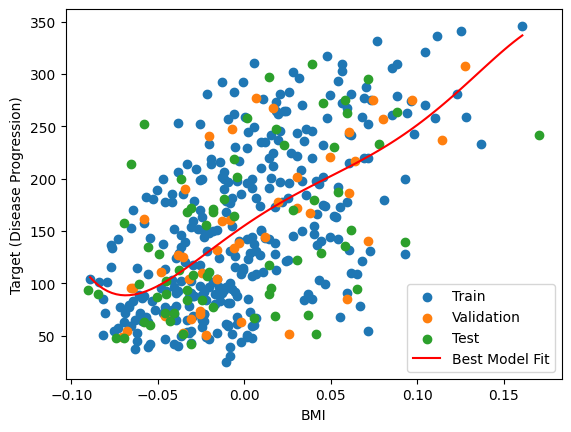

In [134]:
plt.scatter(X_train_bmi, y_train, label='Train')
plt.scatter(X_val_bmi, y_val, label='Validation')
plt.scatter(X_test_bmi, y_test, label='Test')

X_plot = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1) # added this line and corrected the range
X_plot_poly = poly.transform(X_plot) # added this line
y_plot_pred = best_model.predict(X_plot_poly) # added this line


plt.plot(X_plot, y_plot_pred, color='red', label='Best Model Fit') # modified this line
plt.xlabel('BMI')
plt.ylabel('Target (Disease Progression)') # corrected y-axis label
plt.legend()
plt.show()

# Equation of Best Model

In [135]:

# Access coefficients and intercept
coefficients = best_model.coef_
intercept = best_model.intercept_
equation = f"target = {intercept:.2f}" # corrected target variable name
for i, coef in enumerate(coefficients[1:]):  # Start from the first coefficient (after intercept)
    equation += f" + {coef:.2f} * BMI^{i+1}"
print("Equation:", equation)

Equation: target = 155.08 + 1131.59 * BMI^1 + -3946.02 * BMI^2 + -26110.86 * BMI^3 + 768725.87 * BMI^4 + -2823251.97 * BMI^5


# Prediction for a BMI value

In [136]:

bmi_value = 25  # Example
bmi_value_poly = poly.transform([[bmi_value]])
predicted_progression = best_model.predict(bmi_value_poly)
print(f"Predicted target for BMI {bmi_value}: {predicted_progression[0]:.2f}") # corrected target variable name


Predicted target for BMI 25: -27270946919915.69


c:\Users\divya\OneDrive\Documents\AI and ML\S1\FML\CSCN8010\venv\CSCN8010_classical_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [137]:
num_params = len(best_model.coef_) + 1  # Coefficients + intercept
print(f"Number of trainable parameters: {num_params}")

Number of trainable parameters: 7


In [138]:
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)  # Fit and transform

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    num_parameters = len(model.coef_) + 1  # Coefficients + Intercept
    print(f"Degree {degree}: {num_parameters} trainable parameters")

    feature_names = poly.get_feature_names_out() #Get Feature names
    print(f"Degree {degree}: Feature names are {feature_names}")

Degree 0: 2 trainable parameters
Degree 0: Feature names are ['1']
Degree 1: 3 trainable parameters
Degree 1: Feature names are ['1' 'bmi']
Degree 2: 4 trainable parameters
Degree 2: Feature names are ['1' 'bmi' 'bmi^2']
Degree 3: 5 trainable parameters
Degree 3: Feature names are ['1' 'bmi' 'bmi^2' 'bmi^3']
Degree 4: 6 trainable parameters
Degree 4: Feature names are ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Degree 5: 7 trainable parameters
Degree 5: Feature names are ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


# Conclusion

---

**Best Model Performance**

The best model was a polynomial regression of degree 5.
Test Set Performance: R-squared = 0.453513, MAE = 42.083400 , MAPE = 40.340475



**Model Limitations**

*   **Simplicity:** Polynomial regression is a relatively simple model. It assumes a polynomial relationship between the predictor and the target, which might not be the case in reality.
*   **Overfitting:** High-degree polynomial models are prone to overfitting, especially if the dataset is small. Regularization techniques (like Ridge or Lasso regression) could be explored to mitigate this.
*   **Limited Features:** The model only considers BMI as a predictor. Including other relevant features could significantly improve predictive accuracy.
*   **Extrapolation:** Extrapolating beyond the range of BMI values in the training data can lead to unreliable predictions.

# **Part 3: Multivariate Models**


### 1. Polynomial Models (Multivariate)

In [139]:

# Feature Selection 
features_to_use = ['age','bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']  
X_multi = df[features_to_use]

X_multi_train, X_multi_temp, y_train, y_temp = train_test_split(X_multi, y, test_size=0.3, random_state=42)
X_multi_val, X_multi_test, y_val, y_test = train_test_split(X_multi_temp, y_temp, test_size=0.5, random_state=42)


results_multi = []
degrees = [2, 3]  

for degree in degrees:
    poly_multi = PolynomialFeatures(degree=degree)
    X_multi_train_poly = poly_multi.fit_transform(X_multi_train)
    X_multi_val_poly = poly_multi.transform(X_multi_val)
    X_multi_test_poly = poly_multi.transform(X_multi_test)

    model_multi = LinearRegression()
    model_multi.fit(X_multi_train_poly, y_train)

    y_train_pred = model_multi.predict(X_multi_train_poly)
    y_val_pred = model_multi.predict(X_multi_val_poly)
    y_test_pred = model_multi.predict(X_multi_test_poly)

    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    num_params = len(model_multi.coef_) + 1
    feature_names = poly_multi.get_feature_names_out()

    results_multi.append([degree, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val, r2_test, mae_test, mape_test, num_params, feature_names])

results_multi_df = pd.DataFrame(results_multi, columns=['Degree', 'R-squared Train', 'MAE Train', 'MAPE Train', 'R-squared Validation', 'MAE Validation', 'MAPE Validation', 'R-squared Test', 'MAE Test', 'MAPE Test', 'Num Parameters', 'Feature Names'])
print("\nMultivariate Polynomial Regression Results:")
print(results_multi_df)




Multivariate Polynomial Regression Results:
   Degree  R-squared Train  MAE Train  MAPE Train  R-squared Validation  \
0       2         0.518732  44.323625   35.898470              0.355159   
1       3        -1.283625  94.064725   83.927033            -23.731559   

   MAE Validation  MAPE Validation  R-squared Test    MAE Test   MAPE Test  \
0       45.060606        37.161202        0.325456   52.223881   43.815102   
1      234.151515       227.130883      -24.293816  236.582090  233.771006   

   Num Parameters                                      Feature Names  
0              56  [1, age, bmi, bp, s1, s2, s3, s4, s5, s6, age^...  
1             221  [1, age, bmi, bp, s1, s2, s3, s4, s5, s6, age^...  


### 2. Decision Trees

In [140]:


from sklearn.tree import DecisionTreeRegressor

results_dt = []
max_depths = [3, 5] 

for max_depth in max_depths:
    dt_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42) 
    dt_model.fit(X_multi_train, y_train)

    y_train_pred = dt_model.predict(X_multi_train)
    y_val_pred = dt_model.predict(X_multi_val)
    y_test_pred = dt_model.predict(X_multi_test)

    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    results_dt.append([max_depth, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val, r2_test, mae_test, mape_test])

results_dt_df = pd.DataFrame(results_dt, columns=['Max Depth', 'R-squared Train', 'MAE Train', 'MAPE Train', 'R-squared Validation', 'MAE Validation', 'MAPE Validation', 'R-squared Test', 'MAE Test', 'MAPE Test'])
print("\nDecision Tree Results:")
print(results_dt_df)




Decision Tree Results:
   Max Depth  R-squared Train  MAE Train  MAPE Train  R-squared Validation  \
0          3         0.525319  43.550986   39.391959              0.377672   
1          5         0.680099  33.307918   30.279567              0.310036   

   MAE Validation  MAPE Validation  R-squared Test   MAE Test  MAPE Test  
0       41.855953        38.983871        0.287672  51.983161  45.985708  
1       46.461362        41.247788        0.255639  52.397091  41.466855  


### 3. kNNs


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

results_knn = []
k_values = [3, 7]

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_multi_train, y_train)

    y_train_pred = knn_model.predict(X_multi_train)
    y_val_pred = knn_model.predict(X_multi_val)
    y_test_pred = knn_model.predict(X_multi_test)

    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    results_knn.append([k, r2_train, mae_train, mape_train, r2_val, mae_val, mape_val, r2_test, mae_test, mape_test])

results_knn_df = pd.DataFrame(results_knn, columns=['k', 'R-squared Train', 'MAE Train', 'MAPE Train', 'R-squared Validation', 'MAE Validation', 'MAPE Validation', 'R-squared Test', 'MAE Test', 'MAPE Test'])
print("\nkNN Results:")
print(results_knn_df)





kNN Results:
   k  R-squared Train  MAE Train  MAPE Train  R-squared Validation  \
0  3         0.658087  37.051780   31.216831              0.390394   
1  7         0.539219  42.824318   37.165480              0.478358   

   MAE Validation  MAPE Validation  R-squared Test   MAE Test  MAPE Test  
0       40.954545        36.206801        0.352438  46.691542  39.219731  
1       38.809524        34.039900        0.439070  44.912580  38.744682  


# Observations and Reflections

---

After evaluating several models for predicting diabetes progression using the diabetes dataset, we can draw the following conclusions:

**Summary of Model Performance:**

*   **Univariate Polynomial Regression (BMI only):** The best univariate polynomial regression model achieved a validation R-squared of .453513. While using only BMI as a predictor, the model showed some ability to capture the relationship with disease progression, but its performance was limited.

*   **Multivariate Polynomial Regression:** The multivariate polynomial regression models, utilizing features like 'bmi', 'bp', and the others  family of measurements, demonstrated varying performance depending on the degree. These models generally outperformed the univariate models, highlighting the importance of considering multiple factors in diabetes prediction.

*   **Decision Trees:** The decision tree models, with varying `max_depth` parameters, also showed promise.Decision trees offer the advantage of interpretability, allowing us to see which features are most influential in the prediction.

*   **k-Nearest Neighbors (kNN):**  kNN models are non-parametric and can capture complex relationships in the data, but their performance can be sensitive to the choice of `k` and the scaling of features.
